# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [40]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
from pathlib import Path
from bokeh.tile_providers import get_provider, Vendors
import geoviews as gv

# Import API key
from api_keys import geoapify_key


In [41]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
csv_file = Path("output_data/cities.csv")
city_data_df = pd.read_csv(csv_file)

# Display sample data
city_data_df.head()


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,soufriere,13.8562,-61.0566,28.78,89,40,5.66,LC,1720011722
1,1,rakitnoye,50.8389,35.8515,32.58,24,75,2.34,RU,1720011723
2,2,ghat,24.9647,10.1728,41.81,6,0,7.92,LY,1720011725
3,3,lerwick,60.1545,-1.1494,11.00,81,99,8.27,GB,1720011727
4,4,kerikeri,-35.2268,173.9474,7.11,89,4,1.91,NZ,1720011729


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
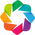

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (Humidity,City,Country)

In [42]:
# Create a map plot
gv.extension('bokeh')
city_humidity_map = city_data_df.hvplot.points(
    'Lng', 'Lat', 
    geo=True, 
    tiles='OSM', 
    size='Humidity', 
    color='Humidity', 
    hover_cols=['City', 'Country', 'Humidity'],
    frame_width=800, 
    frame_height=600, 
    title='City Humidity Map'
)

# Display the plot
city_humidity_map

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [43]:
# Narrow down cities that fit criteria and drop any results with null values
ideal_conditions_df = city_data_df[
    (city_data_df['Max Temp'] >= 20) & 
    (city_data_df['Max Temp'] <= 30) &
    (city_data_df['Humidity'] < 60) &
    (city_data_df['Cloudiness'] < 20) &
    (city_data_df['Wind Speed'] < 10)
]

# Drop any rows with null values
ideal_conditions_df = ideal_conditions_df.dropna()
# Display sample data

print(ideal_conditions_df)
ideal_conditions_df.to_csv('filtered_cities.csv', index=False)

     City_ID               City      Lat       Lng  Max Temp  Humidity  \
25        25            chegutu -18.1302   30.1407     25.81        19   
33        33        skovorodino  53.9833  123.9167     25.30        46   
55        55           eldorado -23.7869  -54.2836     23.77        44   
75        75         taguatinga -12.3857  -46.5711     28.48        37   
81        81     port elizabeth -33.9180   25.5701     21.17        57   
83        83      pollock pines  38.7613 -120.5866     22.28        37   
99        99              caala -12.8525   15.5606     25.74        14   
104      104             giyani -23.3025   30.7187     28.63        15   
206      206            kasempa -13.4584   25.8338     27.98        17   
218      218              revda  56.8010   59.9303     27.10        51   
219      219          inhambane -23.8650   35.3833     24.48        55   
223      223        nova vicosa -17.8919  -39.3719     26.24        54   
250      250            winslow  35.02

### Step 3: Create a new DataFrame called `hotel_df`.

In [44]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
hotel_df = city_data_df[['City', 'Country', 'Lat', 'Lng', 'Humidity']].copy()

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df['Hotel Name'] = ""

# Display sample data
hotel_df.head()

,City,Country,Lat,Lng,Humidity,Hotel Name
0,soufriere,LC,13.8562,-61.0566,89,
1,rakitnoye,RU,50.8389,35.8515,24,
2,ghat,LY,24.9647,10.1728,6,
3,lerwick,GB,60.1545,-1.1494,81,
4,kerikeri,NZ,-35.2268,173.9474,89,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [45]:
import requests
# Set parameters to search for a hotel
radius = 5000  # Radius in meters
params = {
    "categories": "accommodation.hotel",
    "apiKey": geoapify_key,
    "limit": 1
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # Get latitude and longitude from the DataFrame
    latitude = row["Lat"]
    longitude = row["Lng"]

    # Add the current city's latitude and longitude to the params dictionary
    params["filter"] = f"circle:{longitude},{latitude},{radius}"
    params["bias"] = f"proximity:{longitude},{latitude}"

    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make an API request using the params dictionary
    response = requests.get(base_url, params=params)
    
    # Convert the API response to JSON format
    name_address = response.json()

    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"

    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df.head()


Starting hotel search
soufriere - nearest hotel: Leisure Inn
rakitnoye - nearest hotel: No hotel found
ghat - nearest hotel: فندق تاسيلي
lerwick - nearest hotel: Grand Hotel
kerikeri - nearest hotel: Avalon Resort
waitangi - nearest hotel: Hotel Chathams
ushuaia - nearest hotel: Apart Hotel Aires del Beagle
saint-joseph - nearest hotel: No hotel found
port-aux-francais - nearest hotel: Keravel
puerto natales - nearest hotel: Dorotea Patagonia Hostel
kiama - nearest hotel: Nova Kiama
tovuz - nearest hotel: No hotel found
okha - nearest hotel: Сфера
preobrazheniye - nearest hotel: No hotel found
vernon - nearest hotel: Okanagan Royal Park Inn
yellowknife - nearest hotel: No hotel found
aitape - nearest hotel: No hotel found
montepuez - nearest hotel: Complexo Messalo
blackmans bay - nearest hotel: Villa Howden
trenggalek - nearest hotel: Atriaz
callao - nearest hotel: Casa Ronald
ballina - nearest hotel: Ballina Manor Boutique Hotel
aasiaat - nearest hotel: SØMA
adamstown - nearest hotel

,City,Country,Lat,Lng,Humidity,Hotel Name
0,soufriere,LC,13.8562,-61.0566,89,Leisure Inn
1,rakitnoye,RU,50.8389,35.8515,24,No hotel found
2,ghat,LY,24.9647,10.1728,6,فندق تاسيلي
3,lerwick,GB,60.1545,-1.1494,81,Grand Hotel
4,kerikeri,NZ,-35.2268,173.9474,89,Avalon Resort


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [46]:
%%capture --no-display

# Configure the map plot
map_plot = hotel_df.hvplot.points(
    'Lng', 'Lat', 
    geo=True, 
    tiles='OSM', 
    size='Humidity', 
    color='Humidity', 
    hover_cols=['City', 'Country', 'Hotel Name', 'Humidity'],
    frame_width=800, 
    frame_height=600, 
    title='City Humidity Map with Hotel Information'
)

# Display the map
map_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (Humidity,City,Country,Hotel Name)